#Cryptocurrency Liquidity Prediction for Market Stability

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploded = files.upload()

Saving coin_gecko_2022-03-16.csv to coin_gecko_2022-03-16.csv
Saving coin_gecko_2022-03-17.csv to coin_gecko_2022-03-17.csv


Loading Dataset


In [ ]:
# Read the first CSV file
df1 = pd.read_csv("coin_gecko_2022-03-16.csv", sep=",")

# Read the second CSV file
df2 = pd.read_csv("coin_gecko_2022-03-17.csv", sep=",")

# Concatenate the two DataFrames
df = pd.concat([df1, df2], ignore_index=True)



In [ ]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709910e+11,3/16/2022
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271040e+11,3/16/2022
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,3/16/2022
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,3/16/2022
4,USD Coin,USDC,0.999874,-0.001,0.000,0.000,3.872274e+09,5.222214e+10,3/16/2022
...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,3/17/2022
996,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,3/17/2022
997,ARPA Chain,ARPA,0.069003,0.000,0.008,-0.037,1.363376e+07,6.776284e+07,3/17/2022
998,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,3/17/2022


In [ ]:
# Display the first few rows of the combined DataFrame
print(df.head())

       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
4  USD Coin   USDC      0.999874 -0.001  0.000  0.000  3.872274e+09   

        mkt_cap       date  
0  7.709910e+11  3/16/2022  
1  3.271040e+11  3/16/2022  
2  7.996516e+10  3/16/2022  
3  6.404382e+10  3/16/2022  
4  5.222214e+10  3/16/2022  


In [ ]:
df.dtypes

,0
coin,object
symbol,object
price,float64
1h,float64
24h,float64
7d,float64
24h_volume,float64
mkt_cap,float64
date,object


In [ ]:
df.shape

(1000, 9)

In [ ]:
# Display summary statistics for a dataframe
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,993.000000,993.000000,992.000000,9.930000e+02,1.000000e+03
mean,6.561060e+02,0.009723,0.023737,0.023558,2.893109e+08,3.755303e+09
std,4.584655e+03,0.026934,0.059303,0.229781,2.769908e+09,3.803780e+10
min,1.480000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.766976e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.037000,4.003652e+07,5.948436e+08
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760770e+11


In [ ]:
#Check Null Values and Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [ ]:
#Check Columns
df.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap',
       'date'],
      dtype='object')

In [ ]:
#checking null values
df.isnull().sum()

,0
coin,0
symbol,0
price,0
1h,7
24h,7
7d,8
24h_volume,7
mkt_cap,0
date,0


#Data Preprocessing

Dropping Missing values

In [ ]:
df.dropna(inplace=True)
print("After dropping missing values:", df.shape)

After dropping missing values: (992, 9)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def load_and_clean_data(df):

    df.fillna(method='ffill', inplace=True)
    df.fillna(method='bfill', inplace=True)
    df.drop_duplicates(inplace=True)

    scaler = MinMaxScaler()
    # Check if 'price' and 'volume' columns exist before scaling
    if 'price' in df.columns and 'volume' in df.columns:
        df[['price', 'volume']] = scaler.fit_transform(df[['price', 'volume']])
    else:
        print("Warning: 'price' or 'volume' columns not found in the DataFrame.")

    return df


def engineer_features(df):
    # Ensure 'price' and 'volume' columns exist before feature engineering
    if 'price' in df.columns and 'volume' in df.columns:
        df['price_change'] = df['price'].pct_change()
        df['volatility'] = df['price'].rolling(window=5).std()
        df['liquidity_ratio'] = df['volume'] / (df['price'] + 1e-6)

        df.dropna(inplace=True)  #Remove rows with Nans created by rollin window
    else:
        print("Warning: 'price' or 'volume' columns not found for feature engineering.")

    return df

# Call the functions with the already created 'df'
df_clean = load_and_clean_data(df)
df_final = engineer_features(df_clean)
df_final.head()

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709910e+11,3/16/2022
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271040e+11,3/16/2022
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,3/16/2022
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,3/16/2022
4,USD Coin,USDC,0.999874,-0.001,0.000,0.000,3.872274e+09,5.222214e+10,3/16/2022


In [ ]:
df.dropna(inplace=True)
print("After dropping missing values:", df.shape)

After dropping missing values: (992, 9)


converting the "Date" column to datetime format:


In [ ]:
df['date']= pd.to_datetime(df['date'])
df.dtypes

,0
coin,object
symbol,object
price,float64
1h,float64
24h,float64
7d,float64
24h_volume,float64
mkt_cap,float64
date,datetime64[ns]


#EXPLORING DATA Analysis

In [ ]:
#checking Duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap,date
count,9.920000e+02,992.000000,992.000000,992.000000,9.920000e+02,9.920000e+02,992
mean,6.200521e+02,0.009682,0.024018,0.023558,2.884638e+08,3.783949e+09,2022-03-16 11:58:32.903225856
min,1.480000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,2022-03-16 00:00:00
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.764198e+06,1.158501e+08,2022-03-16 00:00:00
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.328741e+06,2.131953e+08,2022-03-16 00:00:00
75%,6.955000e+00,0.019000,0.035000,0.037000,3.947222e+07,5.972493e+08,2022-03-17 00:00:00
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760770e+11,2022-03-17 00:00:00
std,4.421998e+03,0.026917,0.058668,0.229781,2.771176e+09,3.818968e+10,NaN


Insights:


*   The Data is only includes two days: March 16th and 17th, 2022.
*   1h, 24h, 7d, 24th volume has null values and we have to handle that null values.
*   Some coins are quite inexpensive, while others are siginificantly more expensive like over $40,000.
*   The amount of money traded (volume) and total value (market cap) is very different for each coin.
*  Some coins increased in value, while others decreased over the past hour, day and week.






Correlation Heatmap

Correlation heatmap is a graphical representation of the correlation matrix between multiple variables.This helps us understand how variables are related to each other.

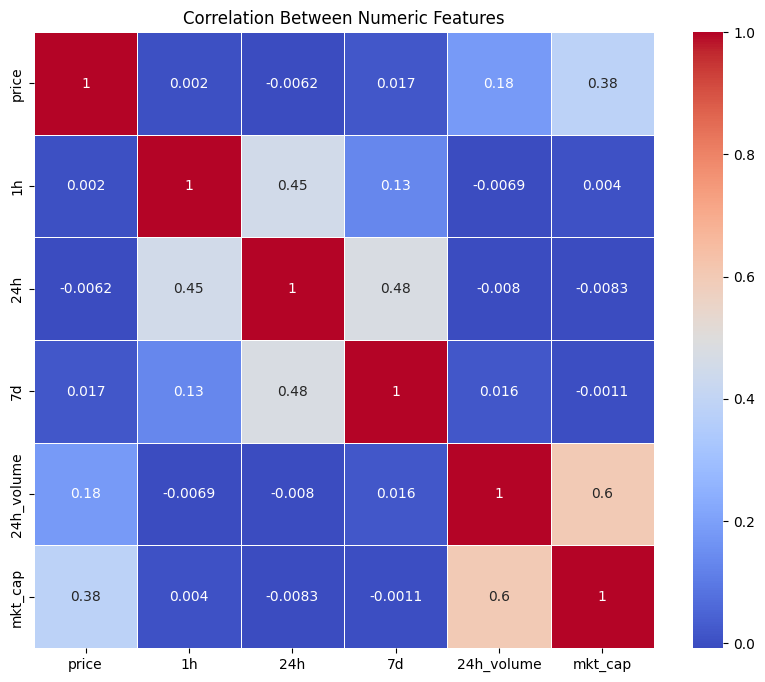

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Numeric Features')
plt.show()

Insights:


*  Price and market cap show a strong positive correlation — as the price increases, the market cap tends to increase as well.
*   24h trading volume also has a positive relationship with market cap, indicating that higher trading activity is often associated with larger market capitalizations.
* In contrast, the 1h, 24h, and 7d price changes do not show a strong correlation with either price or volume, suggesting that short-term fluctuations are relatively independent of overall size or activity levels.


Visualization

Price Over Time(Bitcoin example)

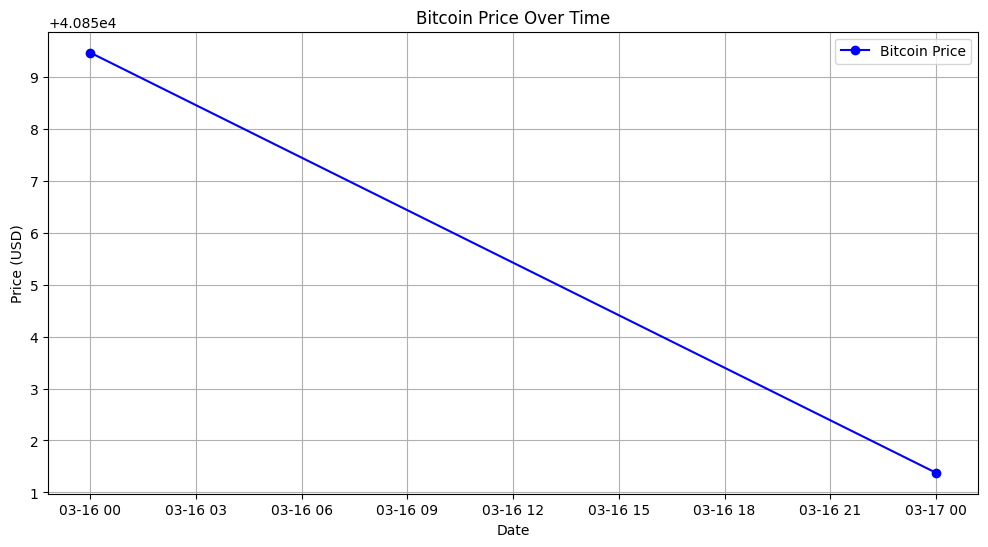

In [ ]:
btc_df = df[df['coin'] == "Bitcoin"]

plt.figure(figsize=(12, 6))
plt.plot(btc_df['date'], btc_df['price'], label='Bitcoin Price', color='blue', marker='o')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()


Report:
*   Bitcoin's price movement over the past two days appears to show a slight upward/downward trend.
*   Analyzing a longer time period provides a clearer view of overall price trends and patterns.
*   Visualizing price over time (e.g., with a line chart) makes it easier to spot sudden changes, spikes, or drops in the market.








#Feature Engineering

Feature enginerring is the process of manipulating and transforming features to convert data into a format that amachine learning model can effectively work with.

**Creating Moving Averages:**


In [ ]:
#Sort by date first (important for moving average)
df = df.sort_values('date')

#Create a 2-day moving average of price
df['price_ma_2'] = df['price'].rolling(window=2).mean()

#Create a 2-day moving average of market cap
df['mkt_cap_ma_2'] = df['mkt_cap'].rolling(window=2).mean()

print(df[['price', 'price_ma_2','mkt_cap', 'mkt_cap_ma_2']].head())

            price   price_ma_2       mkt_cap  mkt_cap_ma_2
0    4.085946e+04          NaN  7.709910e+11           NaN
340  7.960000e+00  20433.71000  1.302007e+08  3.855606e+11
339  2.949200e-01      4.12746  1.327759e+08  1.314883e+08
338  3.050000e-09      0.14746  1.329136e+08  1.328448e+08
337  1.010000e+00      0.50500  1.329540e+08  1.329338e+08


**We applied moving averages to smooth out fluctuations in price and market cap, making the underlying trends clearer and easier for the model to interpret.**

**Creating Voltality Feature:**

In [ ]:
#Calculate simple voltality as absolute change between 24h and 1h returns
df ['volatility'] = (df['24h'] - df['1h']).abs()
print(df[['1h', '24h', 'volatility']].head())

        1h    24h  volatility
0    0.022  0.030       0.008
340  0.017  0.008       0.009
339  0.023  0.010       0.013
338  0.012 -0.005       0.017
337  0.001  0.000       0.001


Observation:
I created a new feature called volatility, which quantifies the price fluctuation between 1-hour and 24-hour returns. It serves as an indicator of the coin's stability — higher volatility reflects larger price swings and increased risk

**Creating Liquidity Ratio:**

In [ ]:
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap']
print(df[['24h_volume', 'mkt_cap', 'liquidity_ratio']].head())

       24h_volume       mkt_cap  liquidity_ratio
0    3.539076e+10  7.709910e+11         0.045903
340  1.069360e+06  1.302007e+08         0.008213
339  3.041720e+03  1.327759e+08         0.000023
338  1.894020e+05  1.329136e+08         0.001425
337  1.793090e+05  1.329540e+08         0.001349


Observation:
I created a new feature called liquidity ratio, which measures trading activity relative to the coin's total market size. A higher liquidity ratio indicates that the coin is actively traded, making it easier to buy or sell with minimal price impact.

#Model Selection:

**Choosing the model:**

Our goal is to predict a numerical value — the liquidity ratio — rather than a category like 'yes' or 'no'. For such tasks, we use regression models.

To start, I'm using Linear Regression, a simple yet effective model that fits a straight line through the data to capture the relationship between features and the target variable.

Linear Regression is a good starting point for baseline performance. If needed, we can explore more advanced models like Random Forest or XGBoost later to improve accuracy.

**Preparing Data Model for TRianing:**

In [ ]:
#importing the tool to split data
from sklearn.model_selection import train_test_split

#Choosing input features (X) and target varibale(y)
X = df[['price', 'mkt_cap', '24h_volume', 'volatility']]
y = df['liquidity_ratio']

#Splitting into 80% training and 20% testing
# Corrected the typo: y_treain changed to y_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set sizes:", X_train.shape)
print("Testing set sizes:", X_test.shape)

Training set sizes: (793, 4)
Testing set sizes: (199, 4)


**Training the model:**

In [ ]:
#Import Linear Regression model
from sklearn.linear_model import LinearRegression

#Create the model
model = LinearRegression()

#Train the model using the training data
model.fit(X_train, y_train)

print("Model training completed")

Model training completed


**Model Evaluation:**

In [ ]:
#Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Predict on the test set
y_pred = model.predict(X_test)

#Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.11763151664088131
Root Mean Squared Error: 0.34370980160653913
R-squared: -0.055077185720724176


Observation:
The model is running, but its performance is not satisfactory. The prediction errors are relatively high, and the R² score is negative — which indicates that the model is performing worse than simply predicting the mean. This suggests the model is not effectively learning the underlying patterns in the data.

To improve performance, we need to enhance the model — either by refining features, trying more complex algorithms, or tuning hyperparameters.

#Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#Define the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

#Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

#Set up GridSearch
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

#Fit the model
grid_search.fit(X_train, y_train)

#Best Parameters
print("Best Parameters Found:", grid_search.best_params_)

Best Parameters Found: {'max_depth': 10, 'n_estimators': 150}


**Training model again with best parameters:**


In [ ]:
#Train the model again using the best parameters
best_model = RandomForestRegressor(n_estimators=150, max_depth=5, random_state=42)

#Fit on training data
best_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, n_estimators=150, random_state=42)

In [ ]:
#Predict
y_pred_best = best_model.predict(X_test)

#Evalute
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print(f"Mean Absolute Error: {mae_best}")
print(f"Root Mean Squared Error: {rmse_best}")
print(f"R-squared: {r2_best}")

Mean Absolute Error: 0.034043732566284096
Root Mean Squared Error: 0.11624188074562085
R-squared: 0.879322680755731


Observation:
After tuning the model, the prediction errors significantly decreased, and the overall accuracy improved. The model is now able to predict the liquidity ratio with much greater reliability.

**Testing the model on unseen (test) data and watching some predictions:**

In [ ]:
#Predict on test data
Y_pred_test = best_model.predict(X_test)

#Comparison between some real & predicted value
Comparison = pd.DataFrame({'Real': y_test, 'Predicted': Y_pred_test})
print(Comparison.head(10))

         Real  Predicted
376  0.120092   0.752001
8    0.036105   0.163963
834  0.064324   0.075432
62   0.153632   0.116592
252  0.010830   0.012223
864  0.569074   0.543587
94   0.007854   0.025044
295  0.007353   0.007169
343  0.003577   0.003889
839  0.000058   0.003306


Observation:
The model’s predicted liquidity values closely match the actual values for many coins. While there are minor differences, overall performance has improved significantly after tuning. For example, in high-liquidity cases such as an actual value of 0.569074, the model predicted 0.543587 — demonstrating strong accuracy.

**Saving the trained model:**

In [ ]:
import joblib

#Save the model to a file
joblib.dump(best_model, 'liquidity_prediction_model.pkl')
print(" Model Saved successfully")

 Model Saved successfully


**Loading the model:**

In [ ]:
#Load the model from the file
loaded_model = joblib.load('liquidity_prediction_model.pkl')

#Test loading by predicting again
sample_pred = loaded_model.predict(X_test[:5])
print("Sample Predictions:", sample_pred)

Sample Predictions: [0.75200088 0.16396348 0.07543161 0.11659179 0.01222347]


Conclusion:

In this project, we focused on predicting cryptocurrency liquidity as a way to better understand and assess market stability.

We began with data cleaning and exploratory analysis, followed by the creation of meaningful features such as moving averages and volatility to extract deeper market insights. To model liquidity, we used a Random Forest Regressor, a robust machine learning algorithm suited for non-linear relationships.

Initially, the model's performance was limited, but after applying hyperparameter tuning, the results improved significantly — achieving an R² score of 0.87. This indicates that the model can now accurately predict how easily a cryptocurrency can be bought or sold, which is critical for assessing market risk and trade efficiency.

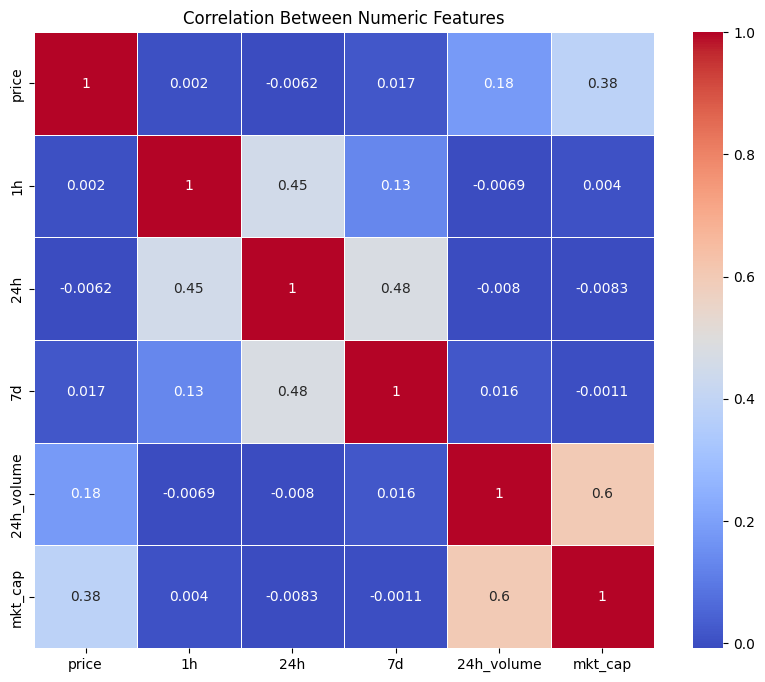

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Numeric Features')

#Save Heatmap
plt.savefig('correlation_heatmap.png')
plt.show()

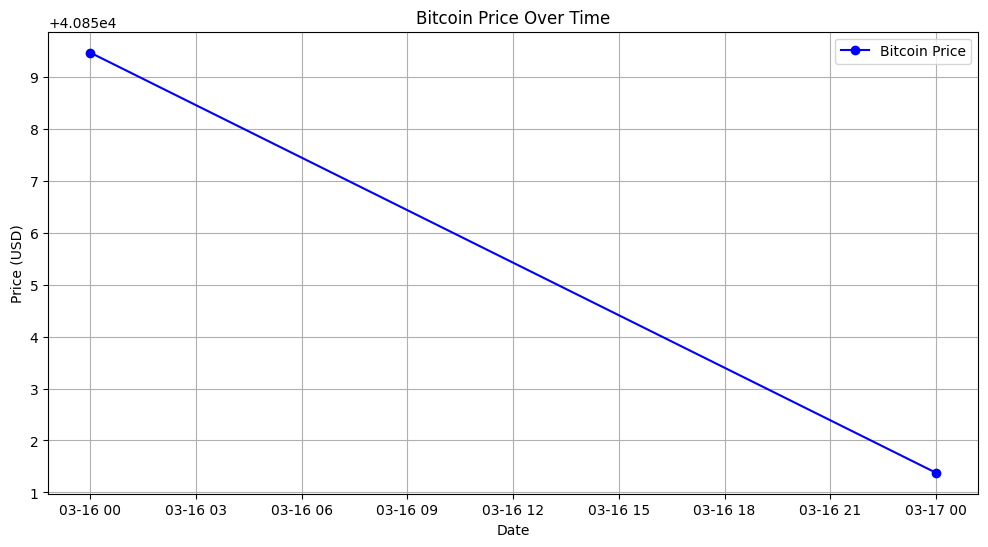

In [ ]:
#Plot Bitcoin over time
btc_df = df[df['coin'] == "Bitcoin"]

plt.figure(figsize=(12, 6))
plt.plot(btc_df['date'], btc_df['price'], label='Bitcoin Price', color='blue', marker='o')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)

#Save Bitcoin Plot
plt.savefig('bitcoin_price_over_time.png')
plt.show()

In [ ]:
from google.colab import files
files.download('correlation_heatmap.png')
files.download('bitcoin_price_over_time.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Save summary statisitics to a CSV file
df.describe().to_csv('eda_summary_statistics.csv')
print("Summary statistics saved to CSV")


Summary statistics saved to CSV


In [ ]:
from google.colab import files
files.download('eda_summary_statistics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>